In [71]:
import pandas
import numpy as np
import matplotlib.pyplot as plt


### Pre processing

In [24]:
df_startups = pandas.read_csv("startups-norway-2016-2018.csv", delimiter=";")
df_startups = df_startups.drop("Unnamed: 8", axis=1)

In [25]:
columns = ["counties", 'q3-2016',
 'q4-2016',
 'q1-2017',
 'q2-2017',
 'q3-2017',
 'q4-2017',
 'q1-2018',]
df_startups.columns = columns

In [36]:
df_startups

,counties,q3-2016,q4-2016,q1-2017,q2-2017,q3-2017,q4-2017,q1-2018
0,01 Østfold,729,710,888,730,762,726,802
1,02 Akershus,1820,1679,2031,1810,1709,1827,2003
2,03 Oslo,3255,3201,3666,3167,3216,3321,3520
3,04 Hedmark,425,408,514,419,382,409,478
4,05 Oppland,410,386,519,438,430,426,529
5,06 Buskerud,815,752,953,742,802,717,891
6,07 Vestfold,700,613,829,660,719,713,754
7,08 Telemark,441,427,520,418,409,463,551
8,09 Aust-Agder,293,273,342,307,257,284,331
9,10 Vest-Agder,538,521,608,517,524,531,587


In [38]:
#Process counties
counties = df_startups.counties

counties = [county.split()[1] for county in counties]

[county.lower() for county in counties ]

counties = ['østfold',
 'akershus',
 'oslo',
 'hedmark',
 'oppland',
 'buskerud',
 'vestfold',
 'telemark',
 'aust-agder',
 'vest-agder',
 'rogaland',
 'hordaland',
 'sogn-og-fjordane',
 'møre-og-romsdal',
 'sør-trøndelag',
 'nord-trøndelag',
 'nordland',
 'troms',
 'finnmark',
 'svalbard',
 'trøndelag',
 'uoppgitt-fylke']

df_startups.counties = counties


In [41]:
#Drop last 3 rows
df_startups_19 = df_startups[:-3]

In [47]:
#Get numbers for 2017
df_startups_2017 = df_startups_19[["counties", "q1-2017","q2-2017","q3-2017","q4-2017"]]

## analysis

In [62]:
df_startups_2017["total"] = df_startups_2017.sum(axis=1)

df_startups_2017

/Users/alvin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,counties,q1-2017,q2-2017,q3-2017,q4-2017,total
0,østfold,888,730,762,726,3106
1,akershus,2031,1810,1709,1827,7377
2,oslo,3666,3167,3216,3321,13370
3,hedmark,514,419,382,409,1724
4,oppland,519,438,430,426,1813
5,buskerud,953,742,802,717,3214
6,vestfold,829,660,719,713,2921
7,telemark,520,418,409,463,1810
8,aust-agder,342,307,257,284,1190
9,vest-agder,608,517,524,531,2180


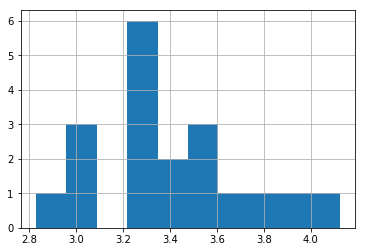

In [73]:
df_startups_2017["total"].apply(lambda x:  np.log10(x)).hist()
plt.show()

In [92]:
df_population = pandas.read_csv("population-2017.csv", delimiter=";", encoding="cp865")
df_population.columns = ['count']

df_population = df_population[1:].reset_index()

df_population.columns = ['county', 'count']
df_population

,county,count
0,01 ╪stfold,292893
1,02 Akershus,604368
2,03 Oslo,666759
3,04 Hedmark,196190
4,05 Oppland,189479
5,06 Buskerud,279714
6,07 Vestfold,247048
7,08 Telemark,173307
8,09 Aust-Agder,116673
9,10 Vest-Agder,184116


In [99]:
populatin_counties = df_population.county

populatin_counties = [county.split()[1] for county in populatin_counties]

[county.lower() for county in populatin_counties ]

populatin_counties = ['østfold',
 'akershus',
 'oslo',
 'hedmark',
 'oppland',
 'buskerud',
 'vestfold',
 'telemark',
 'aust-agder',
 'vest-agder',
 'rogaland',
 'hordaland',
 'sogn-og-fjordane',
 'møre-og-romsdal',
 'trøndelag',
 'sør-trøndelag',
 'nord-trøndelag',
 'nordland',
 'troms',
 'finnmark',
 'svalbard']

df_population["county"] = populatin_counties

df_population

,county,count
0,østfold,292893
1,akershus,604368
2,oslo,666759
3,hedmark,196190
4,oppland,189479
5,buskerud,279714
6,vestfold,247048
7,telemark,173307
8,aust-agder,116673
9,vest-agder,184116


In [115]:
df_population = df_population[df_population["count"] != '0']

In [120]:
#Merge the two data data frames
df_merged = pandas.merge(df_startups_2017, df_population, left_on='counties', right_on='county')

In [125]:
df_merged.head()
df_startups_and_population_2017 = df_merged.drop(['q1-2017','q2-2017','q3-2017','q4-2017', 'county'], axis=1)




In [127]:
#rename columnd
df_startups_and_population_2017.head()
df_startups_and_population_2017.columns = ['county', 'startups_2017', 'population']

In [131]:
#convert cols to integers
df_startups_and_population_2017['startups_2017'] = df_startups_and_population_2017['startups_2017'].astype(int)
df_startups_and_population_2017['population'] = df_startups_and_population_2017['population'].astype(int)

In [143]:
#calculate startups pr capita. 
df_startups_and_population_2017['startups_per_capita'] = df_startups_and_population_2017['startups_2017'] / df_startups_and_population_2017['population']
df_startups_and_population_2017['startups_per_1000'] = df_startups_and_population_2017['startups_2017'] / df_startups_and_population_2017['population'] *1000









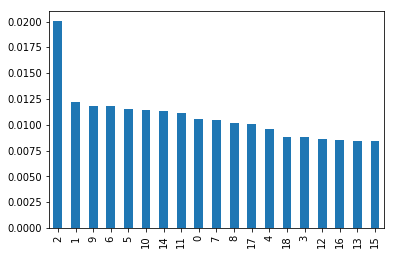

In [154]:
df_startups_and_population_2017["startups_per_capita"].sort_values(ascending=False).plot(kind="bar",x="county")
plt.show()

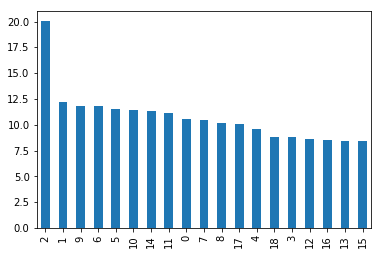

In [151]:
df_startups_and_population_2017["startups_per_1000"].sort_values(ascending=False).plot(kind="bar", x='county')
                                                                                                                                                                             
                                                                                       
                                                                                       
plt.show()

In [155]:
df_startups_and_population_2017

,county,startups_2017,population,startups_per_capita,startups_per_1000
0,østfold,3106,292893,0.010605,10.604555
1,akershus,7377,604368,0.012206,12.206139
2,oslo,13370,666759,0.020052,20.052223
3,hedmark,1724,196190,0.008787,8.787400
4,oppland,1813,189479,0.009568,9.568343
5,buskerud,3214,279714,0.011490,11.490308
6,vestfold,2921,247048,0.011824,11.823613
7,telemark,1810,173307,0.010444,10.443894
8,aust-agder,1190,116673,0.010199,10.199446
9,vest-agder,2180,184116,0.011840,11.840362


In [153]:
file_name = "startups-per-capita-county.csv"
df_startups_and_population_2017.to_csv(file_name, sep='\t', encoding='utf-8')

In [ ]:
[
  "østfold",
  "akershus",
  "aust-agder"
  "buskerud"
  "finnmark"
  "hedmark"
  "hordaland"
  "møre-og-romsdal"
  "nord-trøndelag"
  "nordland"
  "oppland"
  "oslo",
  "rogaland",
  "sør-trøndelag",
  "sogn-og-fjordane",
  "telemark",
  "troms",
  "vest-agder",
  "vestfold",
]

counties = ['østfold',
 'akershus',
 'oslo',
 'hedmark',
 'oppland',
 'buskerud',
 'vestfold',
 'telemark',
 'aust-agder',
 'vest-agder',
 'rogaland',
 'hordaland',
 'sogn-og-fjordane',
 'møre-og-romsdal',
 'sør-trøndelag',
 'nord-trøndelag',
 'nordland',
 'troms',
 'finnmark',
 'svalbard',
 'trøndelag',
 'uoppgitt-fylke']
